<a href="https://colab.research.google.com/github/ertgrulyksk/Data-science-and-EDA-with-Twitch-chat-dataset/blob/main/Data_science_and_EDA_with_Twitch_chat_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from collections import Counter
from plotly.offline import init_notebook_mode, iplot, plot
import plotly.graph_objs as go
import plotly.express as px
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("healthygamer_gg_testdata.csv")

In [3]:
data = data.dropna() # Dropping NaN values

In [4]:
data.head() 

,user,channel,message,timestamp
0,itztony1702,healthygamer_gg,BibleThump BibleThump,2021-07-16 14:05:22
1,flaredrip,healthygamer_gg,SUPERHERO BibleThump BibleThump,2021-07-16 14:05:23
2,modxta23,healthygamer_gg,GOOD DAD FeelsGoodMan,2021-07-16 14:05:23
3,reaperdiff,healthygamer_gg,FeelsStrongMan,2021-07-16 14:05:23
4,3rdkira,healthygamer_gg,drhgWeird,2021-07-16 14:05:25


In [5]:
data.tail() 

,user,channel,message,timestamp
7722,luckman51,healthygamer_gg,no he def new,2021-07-16 15:38:51
7723,mpatricko,healthygamer_gg :I know chat can be slow somet...,P,2021-07-16 15:39:05
7724,luckman51,healthygamer_gg,if u have big bobs. then make money with it,2021-07-16 15:39:29
7726,0v3rki1192,healthygamer_gg,like does he actually now what content she mak...,2021-07-16 15:41:12
7727,wizz4e,healthygamer_gg,he 100% didn't knew/didn't check,2021-07-16 15:42:48


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7626 entries, 0 to 7727
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   user       7626 non-null   object
 1   channel    7626 non-null   object
 2   message    7626 non-null   object
 3   timestamp  7626 non-null   object
dtypes: object(4)
memory usage: 297.9+ KB


In [7]:
data_message = data.message
counter_data = Counter(data.message)
data_most_common_message = counter_data.most_common(15)
data_most_common_message = pd.DataFrame(data_most_common_message)
data_most_common_message.columns = ["a","b"] # when we transform this dataframe pandas names columns 0,1 and we change it to a and b because when we visualaze data they makes some errors
data_most_common_message

,a,b
0,Sadge,266
1,KEKW,247
2,<3,241
3,monkaW,136
4,FeelsStrongMan,135
5,Pog,108
6,EZ,107
7,LUL,105
8,LULW,100
9,OMEGALUL,89


In [8]:
trace1 = go.Bar(
                x = data_most_common_message.a,
                y = data_most_common_message.b,
                name = "most_common_message",
                marker = dict(color = 'rgba(255, 0, 0, 0.5)',
                              line=dict(color='rgb(0,0,0)',width=1.5)),
                text = data_most_common_message.a)

data1 = [trace1]
layout = go.Layout(barmode = "group")
fig = go.Figure(data = data1, layout = layout)
iplot(fig)

In [9]:
counter_data_user = Counter(data.user)
data_most_common_user = counter_data_user.most_common(15)
data_most_common_user = pd.DataFrame(data_most_common_user)
data_most_common_user.columns = ["a","b"]
data_most_common_user

,a,b
0,kwesiquest,121
1,pogchamp_is_whack30303030,101
2,modxta23,98
3,jackjoejacket,86
4,kingkrishlive,75
5,jaytea111,74
6,mahiel3,70
7,klitkommanda,64
8,lmdoubleg,63
9,error_40420,61


In [10]:
trace1 = go.Bar(
                x = data_most_common_user.a,
                y = data_most_common_user.b,
                name = "most_common_message",
                marker = dict(color = 'rgba(255, 0, 0, 0.5)',
                              line=dict(color='rgb(0,0,0)',width=1.5)),
                text = data_most_common_user.a)

data1 = [trace1]
layout = go.Layout(barmode = "group")
fig = go.Figure(data = data1, layout = layout)
iplot(fig)

In [11]:
counter_data_time = Counter(data.timestamp)
data_most_common_timestamp = counter_data_time.most_common(5)
data_most_common_timestamp = pd.DataFrame(data_most_common_timestamp)
data_most_common_timestamp.columns = ["a","b"]
data_most_common_timestamp

,a,b
0,2021-07-16 15:25:24,22
1,2021-07-16 15:25:35,19
2,2021-07-16 14:27:49,18
3,2021-07-16 15:25:33,17
4,2021-07-16 15:25:21,16


Text(0.5, 1.0, 'Most active times')

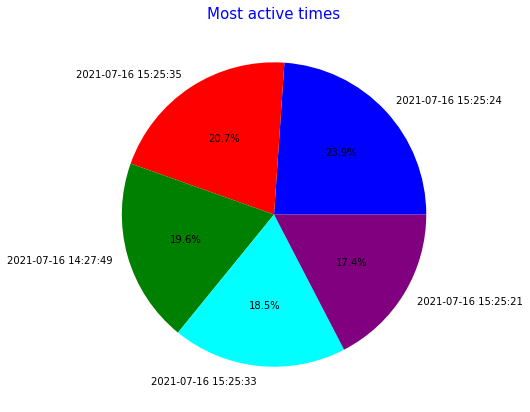

In [12]:
labels = data_most_common_timestamp.a
colors = ['blue','red',"green","cyan","purple"]
explode = [0,0,0,0,0]
sizes = data_most_common_timestamp.b


plt.figure(figsize = (7,7))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('Most active times',color = 'blue',fontsize = 15)

In [13]:
counter_data_channel = Counter(data.channel)
data_most_common_channel = counter_data_channel.most_common(5)
data_most_common_channel = pd.DataFrame(data_most_common_channel)
data_most_common_channel.columns = ["a","b"]
data_most_common_channel

,a,b
0,healthygamer_gg,7412
1,healthygamer_gg :,33
2,healthygamer_gg :Pre-order Dr. K's Guide to Me...,20
3,healthygamer_gg :D,20
4,healthygamer_gg :https,13


In [14]:
fig = px.bar(data_most_common_channel,x="a",y="b")
fig.show()